# Chargement des librairies et des données

In [1]:
# coding: utf-8
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
raw_data = pd.read_csv('prostate_dataset.txt', delimiter='\t')

In [3]:
raw_data.head(10)

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
5,6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
6,7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F
7,8,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415,T
8,9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,F
9,10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F


In [4]:
raw_data.shape

(97, 11)

C’est un jeu de données assez classiques relativement petit, avec 97 observations et 9 variables. Nous allons ici définir comme target y la quantité d’expression de l’antigène qui est associée à la détection de ce cancer (la colonne lpsa du dataset). Les autres variables sont des constantes associées.

On récupère nos variables explicatives pour la régression, qu'on place dans une matrice X et notre variable expliquée y à part. On ne récupère pas la dernière colonne du dataset qui est un booléen associé à la présence du cancer, car on ne traite pas les variables discrètes dans ce TP.

In [5]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

# Baseline : régression linéaire classique

In [6]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

2.864149965701444


# Régression ridge

On appelle alpha le coefficient de régularisation.
On va en tester un certain nombre afin de déterminer celui qui est le plus optimal.

In [7]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

On peut maintenant tester toute les régressions ridges avec les différentes valeur de l'hyperparamètre α . On récupère les poids des différents coefficients de la régression associées ainsi que l'erreur quadratique.

In [8]:
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

On peut afficher l'évolution de la valeur des différents poids associés aux paramètres :

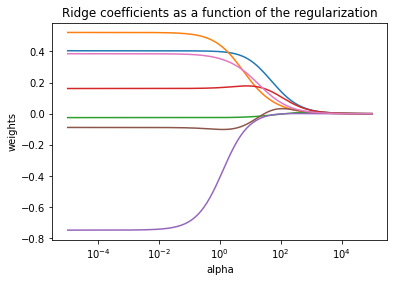

In [9]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

La valeur de alpha diminue les poids de tous les paramètres de la régression. 
Etudions maintenant la valeur de l'erreur quadratique :

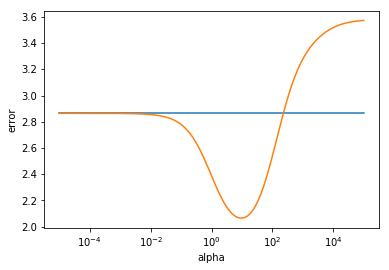

In [10]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

Comme on peut le voir, la régularisation diminue l'erreur sur le jeu de données test. Vers alpha=10, le minimum semble se trouver pour la régression ridge. On peut récupérer la valeur minimum:

In [11]:
min(errors)

[2.864149965701444, 2.064827060795022]

La première valeur correspond à l'erreur avec la régression linéaire classique et la seconde valeur correspond à l'erreur avec la régression Ridge.

# Régression Lasso

On teste aussi un certain nombre d'hyperparamètres pour appliquer le lasso

In [12]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

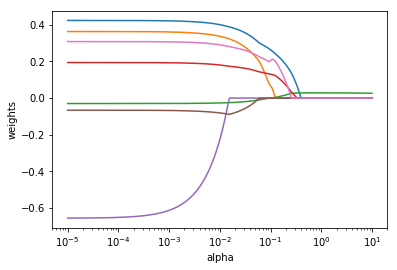

In [13]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

On peut observer maintenant le comportement de l'erreur.

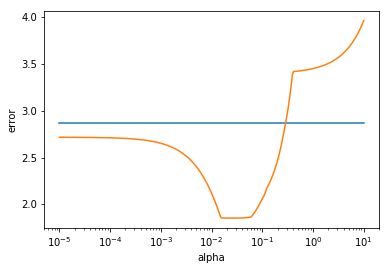

In [14]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [15]:
min(errors)

[2.864149965701444, 1.853156120172837]

On fait encore mieux qu'avec la régression ridge! En effet, le lasso a pour avantage de pouvoir sélectionner un sous-ensemble des variables explicatives afin de permettre une meilleur généralisation.